In [326]:
import pandas as pd
from uszipcode import ZipcodeSearchEngine
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [327]:
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:

# Note that you'll have to paste our API key here. I haven't included it since this will go to the Github repo
client = Socrata("data.lacity.org", "LLaYxNjJnTyIyES7N63sJAUDv")


#Only getting the first 1000 rows to ease computational requirements but when we have all of our codes written
#we should grab the full dataset.
result_list = client.get("7fvc-faax", limit=500000)

# Convert to pandas DataFrame
crime_df = pd.DataFrame.from_records(result_list)
crime_df.head()

,area_id,area_name,crm_cd,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,crm_cd_desc,cross_street,date_occ,date_rptd,dr_no,location,location_1,mocodes,premis_cd,premis_desc,rpt_dist_no,status,status_desc,time_occ,vict_age,vict_descent,vict_sex,weapon_desc,weapon_used_cd
0,01,Central,821,821,NaN,NaN,NaN,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,SAN PEDRO,2010-11-15T00:00:00.000,2010-11-16T00:00:00.000,100120235,7TH,"{'type': 'Point', 'coordinates': [-118.2459, 3...",0519 0540 0537,102,SIDEWALK,0157,AO,Adult Other,2045,30,H,M,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400
1,02,Rampart,810,810,NaN,NaN,NaN,"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W...",NaN,2010-03-01T00:00:00.000,2010-05-19T00:00:00.000,100211716,1600 W 3RD ST,"{'type': 'Point', 'coordinates': [-118.2655, 3...",0527 0554 1258,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",0248,AA,Adult Arrest,0001,11,H,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400
2,07,Wilshire,626,626,NaN,NaN,NaN,INTIMATE PARTNER - SIMPLE ASSAULT,NaN,2010-11-15T00:00:00.000,2010-11-15T00:00:00.000,100700184,6000 CADILLAC AV,"{'type': 'Point', 'coordinates': [-118.3742, 3...",0400 0410 0408 0434 2000,501,SINGLE FAMILY DWELLING,0782,AA,Adult Arrest,0030,49,H,F,NaN,NaN
3,07,Wilshire,930,930,NaN,NaN,NaN,CRIMINAL THREATS - NO WEAPON DISPLAYED,NaN,2010-03-12T00:00:00.000,2010-03-12T00:00:00.000,100700660,7600 BEVERLY BL,"{'type': 'Point', 'coordinates': [-118.3555, 3...",0421,109,PARK/PLAYGROUND,0724,AA,Adult Arrest,1050,41,B,M,VERBAL THREAT,511
4,07,Wilshire,626,626,NaN,NaN,NaN,INTIMATE PARTNER - SIMPLE ASSAULT,NaN,2010-03-13T00:00:00.000,2010-03-13T00:00:00.000,100700661,600 S DETROIT ST,"{'type': 'Point', 'coordinates': [-118.3451, 3...",0400 2000,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",0735,AA,Adult Arrest,0600,27,O,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400


In [328]:
# Converting "date_occ" row to a datetime object
crime_df["date_occ"]=pd.to_datetime(crime_df["date_occ"])

#IGNORE THIS
#Strip month and year from date
#converted_dates = []
#for date in crime_df["date_occ"]:
    #converted_time = datetime.strptime(date, "Y%-%m-%d")
    #converted_dates.append(converted_time)

#Create new columns in Crime dataframe for Month and Year
crime_df["Month"] = [date.month for date in crime_df["date_occ"]]
crime_df["Year"] = [date.year for date in crime_df["date_occ"]]
crime_df.head()

,area_id,area_name,crm_cd,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,crm_cd_desc,cross_street,date_occ,date_rptd,dr_no,location,location_1,mocodes,premis_cd,premis_desc,rpt_dist_no,status,status_desc,time_occ,vict_age,vict_descent,vict_sex,weapon_desc,weapon_used_cd,Month,Year
0,01,Central,821,821,NaN,NaN,NaN,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,SAN PEDRO,2010-11-15,2010-11-16T00:00:00.000,100120235,7TH,"{'type': 'Point', 'coordinates': [-118.2459, 3...",0519 0540 0537,102,SIDEWALK,0157,AO,Adult Other,2045,30,H,M,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400,11,2010
1,02,Rampart,810,810,NaN,NaN,NaN,"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W...",NaN,2010-03-01,2010-05-19T00:00:00.000,100211716,1600 W 3RD ST,"{'type': 'Point', 'coordinates': [-118.2655, 3...",0527 0554 1258,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",0248,AA,Adult Arrest,0001,11,H,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400,3,2010
2,07,Wilshire,626,626,NaN,NaN,NaN,INTIMATE PARTNER - SIMPLE ASSAULT,NaN,2010-11-15,2010-11-15T00:00:00.000,100700184,6000 CADILLAC AV,"{'type': 'Point', 'coordinates': [-118.3742, 3...",0400 0410 0408 0434 2000,501,SINGLE FAMILY DWELLING,0782,AA,Adult Arrest,0030,49,H,F,NaN,NaN,11,2010
3,07,Wilshire,930,930,NaN,NaN,NaN,CRIMINAL THREATS - NO WEAPON DISPLAYED,NaN,2010-03-12,2010-03-12T00:00:00.000,100700660,7600 BEVERLY BL,"{'type': 'Point', 'coordinates': [-118.3555, 3...",0421,109,PARK/PLAYGROUND,0724,AA,Adult Arrest,1050,41,B,M,VERBAL THREAT,511,3,2010
4,07,Wilshire,626,626,NaN,NaN,NaN,INTIMATE PARTNER - SIMPLE ASSAULT,NaN,2010-03-13,2010-03-13T00:00:00.000,100700661,600 S DETROIT ST,"{'type': 'Point', 'coordinates': [-118.3451, 3...",0400 2000,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",0735,AA,Adult Arrest,0600,27,O,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400,3,2010


In [329]:
# Code to look at crime descriptions and their associated crime code
#All the numbers in this data set are stored as objects rather than intergers.
#We may want to convert all numeric columns to numbers but here I'm just converting the crime codes to numbers
crime_df["crm_cd"] = pd.to_numeric(crime_df["crm_cd"])

#Groups by crime description then look at average crime code. This matches 
crime_code = crime_df.groupby("crm_cd_desc")
crime_code = crime_code.mean()
crime_code = crime_code.drop(["Month","Year"], axis=1)
crime_code

,crm_cd
crm_cd_desc,
ABORTION/ILLEGAL,952.0
ARSON,648.0
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,231.0
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",230.0
ATTEMPTED ROBBERY,220.0
BATTERY - SIMPLE ASSAULT,624.0
BATTERY ON A FIREFIGHTER,622.0
BATTERY POLICE (SIMPLE),623.0
BATTERY WITH SEXUAL CONTACT,860.0


In [330]:
lat = []
lon = []
split_lat_longs = []

# For each row in a varible,
for x in range(len(crime_df["location"])):
    # Try to,
    try:
        # Split the row by comma and append
        # everything before the comma to lat
        location = crime_df["location_1"][x]["coordinates"]
        split_lat_longs.append(location)
        lon.append(location[0])
        lat.append(location[1])
        # Split the row by comma and append
        # everything after the comma to lon
        #lon.append(location.split(',')[1])
    # But if you get an error
    except:
        # append a missing value to lat
        lat.append(np.NaN)
        # append a missing value to lon
        lon.append(np.NaN)

crime_df["Latitude"] = lat
crime_df["Longitude"] = lon

In [331]:
from uszipcode import ZipcodeSearchEngine
search = ZipcodeSearchEngine()
zipcodes = []
counter = 0
counter_2 = 0
for index, row in crime_df.iterrows():

    #Get zipcodes based on lat-longs
    try:
        crime_lat = row["Latitude"]
        crime_lon = row["Longitude"]
        zipcode = search.by_coordinate(crime_lat, crime_lon, returns=1)
        zipcodes.append(zipcode[0]["Zipcode"])
        counter_2 = counter_2+1
    except:
        zipcodes.append("NaN")
        counter = counter + 1
        print(f"{counter} exceptions identified on index {counter_2}")
        counter_2 = counter_2+1

crime_df["Zip Code"] = zipcodes

1 exceptions identified on index 743
2 exceptions identified on index 774
3 exceptions identified on index 786
4 exceptions identified on index 801
5 exceptions identified on index 808
6 exceptions identified on index 882
7 exceptions identified on index 891
8 exceptions identified on index 902
9 exceptions identified on index 973
10 exceptions identified on index 1000
11 exceptions identified on index 1040
12 exceptions identified on index 1160
13 exceptions identified on index 1166
14 exceptions identified on index 1219
15 exceptions identified on index 1296
16 exceptions identified on index 1297
17 exceptions identified on index 1406
18 exceptions identified on index 1427
19 exceptions identified on index 1463
20 exceptions identified on index 1464
21 exceptions identified on index 1466
22 exceptions identified on index 1477
23 exceptions identified on index 1517
24 exceptions identified on index 1528
25 exceptions identified on index 1759
26 exceptions identified on index 1795
27 e

207 exceptions identified on index 47582
208 exceptions identified on index 47589
209 exceptions identified on index 47635
210 exceptions identified on index 47639
211 exceptions identified on index 47659
212 exceptions identified on index 47668
213 exceptions identified on index 47706
214 exceptions identified on index 47742
215 exceptions identified on index 47763
216 exceptions identified on index 47786
217 exceptions identified on index 47866
218 exceptions identified on index 47869
219 exceptions identified on index 47901
220 exceptions identified on index 47933
221 exceptions identified on index 47972
222 exceptions identified on index 47988
223 exceptions identified on index 48001
224 exceptions identified on index 48055
225 exceptions identified on index 48113
226 exceptions identified on index 48188
227 exceptions identified on index 48255
228 exceptions identified on index 48266
229 exceptions identified on index 48284
230 exceptions identified on index 48359
231 exceptions i

407 exceptions identified on index 74503
408 exceptions identified on index 74556
409 exceptions identified on index 74557
410 exceptions identified on index 74775
411 exceptions identified on index 74776
412 exceptions identified on index 74777
413 exceptions identified on index 74936
414 exceptions identified on index 75109
415 exceptions identified on index 75110
416 exceptions identified on index 75113
417 exceptions identified on index 75114
418 exceptions identified on index 75151
419 exceptions identified on index 75152
420 exceptions identified on index 75153
421 exceptions identified on index 75175
422 exceptions identified on index 75193
423 exceptions identified on index 75194
424 exceptions identified on index 75195
425 exceptions identified on index 75198
426 exceptions identified on index 75199
427 exceptions identified on index 75200
428 exceptions identified on index 75224
429 exceptions identified on index 75464
430 exceptions identified on index 75547
431 exceptions i

606 exceptions identified on index 103175
607 exceptions identified on index 103448
608 exceptions identified on index 103484
609 exceptions identified on index 103522
610 exceptions identified on index 103552
611 exceptions identified on index 103565
612 exceptions identified on index 103568
613 exceptions identified on index 103569
614 exceptions identified on index 103622
615 exceptions identified on index 103650
616 exceptions identified on index 103654
617 exceptions identified on index 103686
618 exceptions identified on index 103730
619 exceptions identified on index 103806
620 exceptions identified on index 103814
621 exceptions identified on index 103833
622 exceptions identified on index 103838
623 exceptions identified on index 103846
624 exceptions identified on index 103884
625 exceptions identified on index 103933
626 exceptions identified on index 103947
627 exceptions identified on index 103992
628 exceptions identified on index 104004
629 exceptions identified on index

803 exceptions identified on index 113620
804 exceptions identified on index 113656
805 exceptions identified on index 113774
806 exceptions identified on index 113775
807 exceptions identified on index 113788
808 exceptions identified on index 113811
809 exceptions identified on index 113840
810 exceptions identified on index 113850
811 exceptions identified on index 113905
812 exceptions identified on index 113986
813 exceptions identified on index 113995
814 exceptions identified on index 114003
815 exceptions identified on index 114088
816 exceptions identified on index 114192
817 exceptions identified on index 114232
818 exceptions identified on index 114257
819 exceptions identified on index 114355
820 exceptions identified on index 114389
821 exceptions identified on index 114398
822 exceptions identified on index 114402
823 exceptions identified on index 114494
824 exceptions identified on index 114508
825 exceptions identified on index 114536
826 exceptions identified on index

1000 exceptions identified on index 125157
1001 exceptions identified on index 125649
1002 exceptions identified on index 125687
1003 exceptions identified on index 126128
1004 exceptions identified on index 126211
1005 exceptions identified on index 126280
1006 exceptions identified on index 126311
1007 exceptions identified on index 126485
1008 exceptions identified on index 126496
1009 exceptions identified on index 126593
1010 exceptions identified on index 126679
1011 exceptions identified on index 126732
1012 exceptions identified on index 126938
1013 exceptions identified on index 126963
1014 exceptions identified on index 126980
1015 exceptions identified on index 127022
1016 exceptions identified on index 127221
1017 exceptions identified on index 127228
1018 exceptions identified on index 127412
1019 exceptions identified on index 127508
1020 exceptions identified on index 127561
1021 exceptions identified on index 127787
1022 exceptions identified on index 127883
1023 except

1191 exceptions identified on index 140944
1192 exceptions identified on index 140984
1193 exceptions identified on index 141016
1194 exceptions identified on index 141048
1195 exceptions identified on index 141069
1196 exceptions identified on index 141160
1197 exceptions identified on index 141211
1198 exceptions identified on index 141243
1199 exceptions identified on index 141265
1200 exceptions identified on index 141336
1201 exceptions identified on index 141341
1202 exceptions identified on index 141662
1203 exceptions identified on index 142993
1204 exceptions identified on index 143016
1205 exceptions identified on index 143258
1206 exceptions identified on index 143274
1207 exceptions identified on index 143295
1208 exceptions identified on index 143356
1209 exceptions identified on index 143368
1210 exceptions identified on index 143371
1211 exceptions identified on index 143393
1212 exceptions identified on index 143410
1213 exceptions identified on index 143446
1214 except

1384 exceptions identified on index 150461
1385 exceptions identified on index 150504
1386 exceptions identified on index 150583
1387 exceptions identified on index 150598
1388 exceptions identified on index 150621
1389 exceptions identified on index 150677
1390 exceptions identified on index 150727
1391 exceptions identified on index 150854
1392 exceptions identified on index 150856
1393 exceptions identified on index 150924
1394 exceptions identified on index 150937
1395 exceptions identified on index 150981
1396 exceptions identified on index 151086
1397 exceptions identified on index 151093
1398 exceptions identified on index 151136
1399 exceptions identified on index 151193
1400 exceptions identified on index 151215
1401 exceptions identified on index 151222
1402 exceptions identified on index 151396
1403 exceptions identified on index 151601
1404 exceptions identified on index 151640
1405 exceptions identified on index 151643
1406 exceptions identified on index 151676
1407 except

1576 exceptions identified on index 198453
1577 exceptions identified on index 198457
1578 exceptions identified on index 198471
1579 exceptions identified on index 198473
1580 exceptions identified on index 198475
1581 exceptions identified on index 198485
1582 exceptions identified on index 198508
1583 exceptions identified on index 198512
1584 exceptions identified on index 198514
1585 exceptions identified on index 198522
1586 exceptions identified on index 198526
1587 exceptions identified on index 198607
1588 exceptions identified on index 198681
1589 exceptions identified on index 198745
1590 exceptions identified on index 198746
1591 exceptions identified on index 198770
1592 exceptions identified on index 198790
1593 exceptions identified on index 198800
1594 exceptions identified on index 198804
1595 exceptions identified on index 198811
1596 exceptions identified on index 198826
1597 exceptions identified on index 198829
1598 exceptions identified on index 198897
1599 except

In [332]:
crime_df.tail()

,area_id,area_name,crm_cd,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,crm_cd_desc,cross_street,date_occ,date_rptd,dr_no,location,location_1,mocodes,premis_cd,premis_desc,rpt_dist_no,status,status_desc,time_occ,vict_age,vict_descent,vict_sex,weapon_desc,weapon_used_cd,Month,Year,Latitude,Longitude,Zip Code
499995,12,77th Street,510,510,NaN,NaN,NaN,VEHICLE - STOLEN,NaN,2011-04-13,2011-04-13T00:00:00.000,111211299,700 W GAGE AV,"{'type': 'Point', 'coordinates': [-118.2856, 3...",NaN,101,STREET,1249,IC,Invest Cont,1300,10,NaN,NaN,NaN,NaN,4,2011,33.9823,-118.2856,90003
499996,12,77th Street,330,330,NaN,NaN,NaN,BURGLARY FROM VEHICLE,NaN,2011-04-05,2011-04-06T00:00:00.000,111210716,700 W 82ND ST,"{'type': 'Point', 'coordinates': [-118.2856, 3...",0329 0344 1300 1609 1822,101,STREET,1266,IC,Invest Cont,1640,43,B,F,NaN,NaN,4,2011,33.9643,-118.2856,90003
499997,12,77th Street,210,210,NaN,NaN,NaN,ROBBERY,NaN,2011-05-03,2011-05-04T00:00:00.000,111212685,8500 S BROADWAY,"{'type': 'Point', 'coordinates': [-118.2782, 3...",0315 0324 0334 0337 0449 1236 1822,210,RESTAURANT/FAST FOOD,1267,IC,Invest Cont,0330,46,H,M,OTHER KNIFE,207,5,2011,33.9616,-118.2782,90003
499998,12,77th Street,310,310,NaN,NaN,NaN,BURGLARY,NaN,2011-04-27,2011-04-28T00:00:00.000,111212312,1600 W 84TH ST,"{'type': 'Point', 'coordinates': [-118.3046, 3...",0321 0344 1309 1609 1822,501,SINGLE FAMILY DWELLING,1263,IC,Invest Cont,0700,36,H,F,NaN,NaN,4,2011,33.9627,-118.3046,90047
499999,12,77th Street,510,510,NaN,NaN,NaN,VEHICLE - STOLEN,NaN,2011-04-23,2011-04-23T00:00:00.000,111212038,1600 W 60TH PL,"{'type': 'Point', 'coordinates': [-118.3046, 3...",NaN,101,STREET,1233,IC,Invest Cont,1700,10,NaN,NaN,NaN,NaN,4,2011,33.9851,-118.3046,90062


In [356]:
crime_df["crm_cd_desc"].value_counts()

BATTERY - SIMPLE ASSAULT                                           47186
BURGLARY FROM VEHICLE                                              41361
VEHICLE - STOLEN                                                   40677
BURGLARY                                                           35710
THEFT PLAIN - PETTY ($950 & UNDER)                                 31483
INTIMATE PARTNER - SIMPLE ASSAULT                                  26785
THEFT OF IDENTITY                                                  26474
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                           22417
ROBBERY                                                            21550
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114       21361
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT                     21301
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036       18545
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)                    18478
CRIMINAL THREATS - NO WEAPON DISPLAYED             

In [333]:
violent_crimes = crime_df.loc[crime_df["crm_cd_desc"]=="CRIMINAL HOMICIDE"]

violent_crime_list = ["RAPE, ATTEMPTED","ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER", "LYNCHING", "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT","BATTERY - SIMPLE ASSAULT",
"BATTERY ON A FIREFIGHTER", "BATTERY POLICE (SIMPLE)","BATTERY WITH SEXUAL CONTACT","LYNCHING - ATTEMPTED","RAPE, FORCIBLE",]

for vc in violent_crime_list:
    v_temp = crime_df.loc[crime_df["crm_cd_desc"]==vc]
    violent_crimes = pd.concat([violent_crimes, v_temp])
    print(f"{vc} added to list")

RAPE, ATTEMPTED added to list
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER added to list
LYNCHING added to list
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT added to list
BATTERY - SIMPLE ASSAULT added to list
BATTERY ON A FIREFIGHTER added to list
BATTERY POLICE (SIMPLE) added to list
BATTERY WITH SEXUAL CONTACT added to list
LYNCHING - ATTEMPTED added to list
RAPE, FORCIBLE added to list


In [334]:
violent_crimes

,area_id,area_name,crm_cd,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,crm_cd_desc,cross_street,date_occ,date_rptd,dr_no,location,location_1,mocodes,premis_cd,premis_desc,rpt_dist_no,status,status_desc,time_occ,vict_age,vict_descent,vict_sex,weapon_desc,weapon_used_cd,Month,Year,Latitude,Longitude,Zip Code
266,16,Foothill,110,110,998,NaN,NaN,CRIMINAL HOMICIDE,NaN,2011-07-13,2011-07-13T00:00:00.000,111613334,11600 BROMONT AV,"{'type': 'Point', 'coordinates': [-118.4048, 3...",0407 0430 0906 1100 1414 1409 1407 1402,501,SINGLE FAMILY DWELLING,1602,AA,Adult Arrest,1612,25,B,F,UNKNOWN FIREARM,106,7,2011,34.2809,-118.4048,91340
322,05,Harbor,110,110,NaN,NaN,NaN,CRIMINAL HOMICIDE,NaN,2015-09-03,2015-09-03T00:00:00.000,150501088,25900 S WESTERN AV,"{'type': 'Point', 'coordinates': [-118.3076, 3...",0430 1100 0202,101,STREET,0531,AA,Adult Arrest,1910,42,H,M,HAND GUN,102,9,2015,33.7882,-118.3076,90710
354,09,Van Nuys,110,110,NaN,NaN,NaN,CRIMINAL HOMICIDE,NaN,2015-10-10,2015-10-11T00:00:00.000,150918012,6000 KESTER AV,"{'type': 'Point', 'coordinates': [-118.4574, 3...",0906 1100 0430,101,STREET,0941,AA,Adult Arrest,2250,19,H,M,UNKNOWN FIREARM,106,10,2015,34.1794,-118.4574,91411
409,03,Southwest,110,110,NaN,NaN,NaN,CRIMINAL HOMICIDE,COLISEUM ST,2016-12-03,2016-12-03T00:00:00.000,160326463,NICOLET AV,"{'type': 'Point', 'coordinates': [-118.3403, 3...",3037 3104 2000,101,STREET,0363,AA,Adult Arrest,0200,50,B,F,VEHICLE,307,12,2016,34.0126,-118.3403,90008
559,12,77th Street,110,110,NaN,NaN,NaN,CRIMINAL HOMICIDE,VERNON AV,2016-04-05,2016-04-05T00:00:00.000,161210900,HARBOR FY,"{'type': 'Point', 'coordinates': [-118.2813, 3...",1822 0408,110,FREEWAY,1209,IC,Invest Cont,1300,19,H,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400,4,2016,34.0038,-118.2813,90037
764,01,Central,110,110,NaN,NaN,NaN,CRIMINAL HOMICIDE,GLADYS AV,2017-02-12,2017-02-12T00:00:00.000,170106659,CENTRAL,"{'type': 'Point', 'coordinates': [-118.2397, 3...",1100 0430 1218 0906 2004,102,SIDEWALK,0148,AA,Adult Arrest,0317,42,H,M,HAND GUN,102,2,2017,34.0429,-118.2397,90013
769,01,Central,110,110,998,NaN,NaN,CRIMINAL HOMICIDE,SAN PEDRO ST,2017-04-03,2017-04-03T00:00:00.000,170110825,7TH,"{'type': 'Point', 'coordinates': [-118.2468, 3...",1402 0411 0429 1310 2004,116,OTHER/OUTSIDE,0166,AA,Adult Arrest,2130,53,H,M,UNKNOWN WEAPON/OTHER WEAPON,500,4,2017,34.0407,-118.2468,90013
793,01,Central,110,110,NaN,NaN,NaN,CRIMINAL HOMICIDE,NaN,2017-05-26,2017-05-26T00:00:00.000,170115263,500 GLADYS AV,"{'type': 'Point', 'coordinates': [-118.2405, 3...",0302 1100 0400 0906 0430,102,SIDEWALK,0158,AA,Adult Arrest,1128,35,B,M,HAND GUN,102,5,2017,34.0421,-118.2405,90013
812,01,Central,110,110,NaN,NaN,NaN,CRIMINAL HOMICIDE,NaN,2017-06-23,2017-06-23T00:00:00.000,170117818,500 S SAN PEDRO ST,"{'type': 'Point', 'coordinates': [-118.2439, 3...",1100 0430 0906 2004,102,SIDEWALK,0157,AA,Adult Arrest,0553,62,B,M,SEMI-AUTOMATIC PISTOL,109,6,2017,34.0442,-118.2439,90013
818,01,Central,110,110,998,NaN,NaN,CRIMINAL HOMICIDE,WALL ST,2017-06-25,2017-06-25T00:00:00.000,170118021,4TH ST,"{'type': 'Point', 'coordinates': [-118.2447, 3...",1402 0430 0906 2004 1218 0930 1100,103,ALLEY,0138,AA,Adult Arrest,0650,43,B,M,UNKNOWN FIREARM,106,6,2017,34.0464,-118.2447,90013


In [335]:
months = violent_crimes.groupby("Month").count()

In [336]:
months_axis  = ["Jan","Feb","Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]

In [337]:
monthly_crime = months["area_name"]

<BarContainer object of 12 artists>

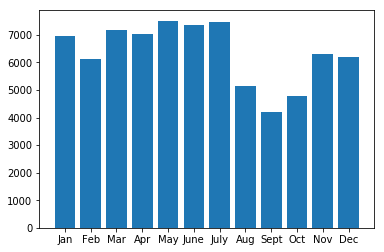

In [338]:
plt.bar(months_axis, monthly_crime)


In [339]:
years = violent_crimes.groupby("Year").count()

In [340]:
years_axis = ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]

In [341]:
yearly_crime = years["area_name"]

<BarContainer object of 9 artists>

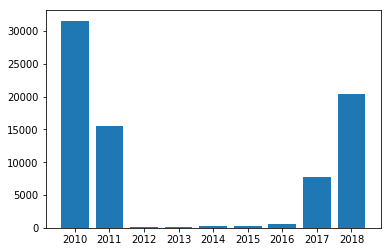

In [342]:
plt.bar(years_axis, yearly_crime)

In [345]:
crime_2010 = violent_crimes.loc[violent_crimes["Year"]==2010]
crime_2010 = crime_2010.groupby("Zip Code").count().reset_index()
crime_2010 = crime_2010[["Zip Code", "crm_cd_1"]]
crime_2010 = crime_2010.rename(columns={"crm_cd_1": "2010 Crime count"})

crime_2011 = violent_crimes.loc[violent_crimes["Year"]==2011]
crime_2011 = crime_2011.groupby("Zip Code").count().reset_index()
crime_2011 = crime_2011[["Zip Code", "crm_cd_1"]]
crime_2011 = crime_2011.rename(columns={"crm_cd_1": "2011 Crime count"})


crime_2012 = violent_crimes.loc[violent_crimes["Year"]==2012]
crime_2012 = crime_2012.groupby("Zip Code").count().reset_index()
crime_2012 = crime_2012[["Zip Code", "crm_cd_1"]]
crime_2012 = crime_2012.rename(columns={"crm_cd_1": "2012 Crime count"})


crime_2013 = violent_crimes.loc[violent_crimes["Year"]==2013]
crime_2013 = crime_2013.groupby("Zip Code").count().reset_index()
crime_2013 = crime_2013[["Zip Code", "crm_cd_1"]]
crime_2013 = crime_2013.rename(columns={"crm_cd_1": "2013 Crime count"})


crime_2014 = violent_crimes.loc[violent_crimes["Year"]==2014]
crime_2014 = crime_2014.groupby("Zip Code").count().reset_index()
crime_2014 = crime_2014[["Zip Code", "crm_cd_1"]]
crime_2014 = crime_2014.rename(columns={"crm_cd_1": "2014 Crime count"})


crime_2015 = violent_crimes.loc[violent_crimes["Year"]==2015]
crime_2015 = crime_2015.groupby("Zip Code").count().reset_index()
crime_2015 = crime_2015[["Zip Code", "crm_cd_1"]]
crime_2015 = crime_2015.rename(columns={"crm_cd_1": "2015 Crime count"})


crime_2016 = violent_crimes.loc[violent_crimes["Year"]==2016]
crime_2016 = crime_2016.groupby("Zip Code").count().reset_index()
crime_2016 = crime_2016[["Zip Code", "crm_cd_1"]]
crime_2016 = crime_2016.rename(columns={"crm_cd_1": "2016 Crime count"})


crime_2017 = violent_crimes.loc[violent_crimes["Year"]==2017]
crime_2017 = crime_2017.groupby("Zip Code").count().reset_index()
crime_2017 = crime_2017[["Zip Code", "crm_cd_1"]]
crime_2017 = crime_2017.rename(columns={"crm_cd_1": "2017 Crime count"})


crime_2018 = violent_crimes.loc[violent_crimes["Year"]==2018]
crime_2018 = crime_2018.groupby("Zip Code").count().reset_index()
crime_2018 = crime_2018[["Zip Code", "crm_cd_1"]]
crime_2018 = crime_2018.rename(columns={"crm_cd_1": "2018 Crime count"})


In [346]:
crime_by_year = crime_2010.merge(crime_2011, on="Zip Code", how = "outer")
crime_by_year = crime_by_year.merge(crime_2012, on="Zip Code", how = "outer")
crime_by_year = crime_by_year.merge(crime_2013, on="Zip Code", how = "outer")
crime_by_year = crime_by_year.merge(crime_2014, on="Zip Code", how = "outer")
crime_by_year = crime_by_year.merge(crime_2015, on="Zip Code", how = "outer")
crime_by_year = crime_by_year.merge(crime_2016, on="Zip Code", how = "outer")
crime_by_year = crime_by_year.merge(crime_2017, on="Zip Code", how = "outer")
crime_by_year = crime_by_year.merge(crime_2018, on="Zip Code", how = "outer")


In [347]:
len(crime_2015)

96

In [348]:
crime_by_year

,Zip Code,2010 Crime count,2011 Crime count,2012 Crime count,2013 Crime count,2014 Crime count,2015 Crime count,2016 Crime count,2017 Crime count,2018 Crime count
0,90001,79.0,23.0,NaN,NaN,NaN,NaN,1.0,19.0,34.0
1,90002,554.0,4.0,NaN,3.0,3.0,4.0,8.0,150.0,330.0
2,90003,1504.0,300.0,3.0,4.0,8.0,15.0,15.0,291.0,904.0
3,90004,285.0,37.0,NaN,1.0,NaN,2.0,16.0,74.0,165.0
4,90005,256.0,53.0,2.0,NaN,2.0,1.0,17.0,73.0,138.0
5,90006,475.0,46.0,2.0,5.0,10.0,6.0,27.0,102.0,264.0
6,90007,448.0,354.0,NaN,1.0,3.0,6.0,13.0,116.0,278.0
7,90008,365.0,384.0,NaN,NaN,2.0,1.0,2.0,83.0,194.0
8,90010,208.0,2.0,NaN,2.0,2.0,6.0,15.0,66.0,154.0
9,90011,935.0,2.0,NaN,NaN,1.0,3.0,10.0,157.0,506.0


In [349]:
populations = []
for index, row in crime_by_year.iterrows():

    #Get zipcodes based on lat-longs
    try:
        violent_zip = row["Zip Code"]
        population_zip = search.by_zipcode(violent_zip)
        populations.append(population_zip["Population"])
    except:
        populations.append("NaN")
        print(f"exception encountered")


crime_by_year["Population"] = populations

In [350]:
crime_by_year

,Zip Code,2010 Crime count,2011 Crime count,2012 Crime count,2013 Crime count,2014 Crime count,2015 Crime count,2016 Crime count,2017 Crime count,2018 Crime count,Population
0,90001,79.0,23.0,NaN,NaN,NaN,NaN,1.0,19.0,34.0,57110.0
1,90002,554.0,4.0,NaN,3.0,3.0,4.0,8.0,150.0,330.0,51223.0
2,90003,1504.0,300.0,3.0,4.0,8.0,15.0,15.0,291.0,904.0,66266.0
3,90004,285.0,37.0,NaN,1.0,NaN,2.0,16.0,74.0,165.0,62180.0
4,90005,256.0,53.0,2.0,NaN,2.0,1.0,17.0,73.0,138.0,37681.0
5,90006,475.0,46.0,2.0,5.0,10.0,6.0,27.0,102.0,264.0,59185.0
6,90007,448.0,354.0,NaN,1.0,3.0,6.0,13.0,116.0,278.0,40920.0
7,90008,365.0,384.0,NaN,NaN,2.0,1.0,2.0,83.0,194.0,32327.0
8,90010,208.0,2.0,NaN,2.0,2.0,6.0,15.0,66.0,154.0,3800.0
9,90011,935.0,2.0,NaN,NaN,1.0,3.0,10.0,157.0,506.0,103892.0


In [361]:
crime_by_year["2010 Crime Rate"]= crime_by_year["2010 Crime count"]/crime_by_year["Population"]*100000
crime_by_year["2011 Crime Rate"]= crime_by_year["2011 Crime count"]/crime_by_year["Population"]*100000
crime_by_year["2012 Crime Rate"]= crime_by_year["2012 Crime count"]/crime_by_year["Population"]*100000
crime_by_year["2013 Crime Rate"]= crime_by_year["2013 Crime count"]/crime_by_year["Population"]*100000
crime_by_year["2014 Crime Rate"]= crime_by_year["2014 Crime count"]/crime_by_year["Population"]*100000
crime_by_year["2015 Crime Rate"]= crime_by_year["2015 Crime count"]/crime_by_year["Population"]*100000
crime_by_year["2016 Crime Rate"]= crime_by_year["2016 Crime count"]/crime_by_year["Population"]*100000
crime_by_year["2017 Crime Rate"]= crime_by_year["2017 Crime count"]/crime_by_year["Population"]*100000
crime_by_year["2018 Crime Rate"]= crime_by_year["2018 Crime count"]/crime_by_year["Population"]*100000


In [366]:
crime_by_year = crime_by_year.dropna()

In [367]:
crime_by_year

,Zip Code,2010 Crime count,2011 Crime count,2012 Crime count,2013 Crime count,2014 Crime count,2015 Crime count,2016 Crime count,2017 Crime count,2018 Crime count,Population,2010 Crime Rate,2011 Crime Rate,2012 Crime Rate,2013 Crime Rate,2014 Crime Rate,2015 Crime Rate,2016 Crime Rate,2017 Crime Rate,2018 Crime Rate
2,90003,1504.0,300.0,3.0,4.0,8.0,15.0,15.0,291.0,904.0,66266.0,2269.640540,452.720852,4.527209,6.036278,12.072556,22.636043,22.636043,439.139227,1364.198835
5,90006,475.0,46.0,2.0,5.0,10.0,6.0,27.0,102.0,264.0,59185.0,802.568218,77.722396,3.379235,8.448087,16.896173,10.137704,45.619667,172.340965,446.058968
14,90016,433.0,391.0,3.0,2.0,2.0,2.0,3.0,103.0,261.0,47596.0,909.740314,821.497605,6.303051,4.202034,4.202034,4.202034,6.303051,216.404740,548.365409
17,90019,389.0,373.0,5.0,3.0,5.0,3.0,5.0,70.0,250.0,64458.0,603.493748,578.671383,7.756989,4.654193,7.756989,4.654193,7.756989,108.597847,387.849452
25,90028,935.0,1019.0,1.0,2.0,3.0,8.0,18.0,242.0,664.0,28714.0,3256.251306,3548.791530,3.482622,6.965243,10.447865,27.860974,62.687191,842.794456,2312.460821
26,90029,642.0,643.0,2.0,1.0,8.0,6.0,15.0,182.0,393.0,38617.0,1662.480255,1665.069788,5.179066,2.589533,20.716265,15.537199,38.842997,471.295026,1017.686511
33,90037,1125.0,356.0,5.0,1.0,5.0,6.0,16.0,275.0,623.0,62276.0,1806.474404,571.648789,8.028775,1.605755,8.028775,9.634530,25.692080,441.582632,1000.385381
38,90043,717.0,282.0,3.0,2.0,2.0,3.0,6.0,135.0,324.0,44789.0,1600.839492,629.618880,6.698073,4.465382,4.465382,6.698073,13.396146,301.413293,723.391904
48,90059,549.0,2.0,3.0,2.0,3.0,8.0,9.0,109.0,255.0,40952.0,1340.593866,4.883766,7.325650,4.883766,7.325650,19.535065,21.976949,266.165267,622.680211
57,90069,68.0,51.0,1.0,1.0,1.0,2.0,2.0,12.0,41.0,20483.0,331.982620,248.986965,4.882097,4.882097,4.882097,9.764195,9.764195,58.585168,200.165991
